<a href="https://colab.research.google.com/github/navgaur/Mathematical-Physics-II/blob/main/Least_Sq_Fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Least Square Fit**

## **Linear Least Square fit**

Fit the data points to
$$ y = m x + b$$
where

* y : Dependent variable
* x : Independent variable   
* m : Slope of the line
* b : y-intercept

We minimize the sum of the squared differences:
$$ S = \sum_{i=1}^n \left(y_i - (m x_i +b) \right)^2 $$
where $n$ is the number of data points and $(x_i,y_i)$ are the coordinates of each of the data point.

Least Square method is to minimize $S$ on the variables $m,b$ on which fit is to be made:
$$ \frac{\partial S}{\partial m} = - 2 \sum_{i=1}^n x_i \left(y_i - (m x_i + b) \right) = 0 $$
$$ \frac{\partial S}{\partial b} = - 2 \sum_{i=1}^n \left(y_i - (m x_i + b) \right)$$
We can solve the above two equations for $m$ and $b$.

$$ m = \frac{n \left(\sum_{i=1}^n x_i y_i \right) - \sum_{i=1}^n x_i  \sum_{i=1}^n y_i}{n \sum_{i=1}^n x_i^2 - \left(\sum_{i=1}^n x_i\right)^2} $$

$$ b = \frac{\sum_{i=1}^n y_i - m \sum_{i=1}^n x_i}{n}
$$

### **Linear Fit**
$$y = m x + b$$

1.510791366906476 0.4118705035971182


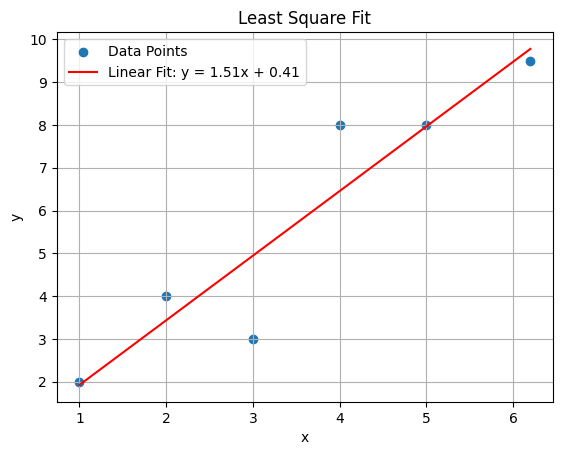

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def linear_lsq_fit(x,y):
  n = len(x)
  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_xy = np.sum(x*y)
  sum_x_sq = np.sum(x**2)

  m = (n*sum_xy - sum_x*sum_y)/(n*sum_x_sq - sum_x**2)
  b = (sum_y - m*sum_x)/n
  return m, b

# Data
x_data = np.array([1,2,3,4,5,6.2])
y_data = np.array([2,4,3,8,8,9.5])

m,b = linear_lsq_fit(x_data,y_data)
print(m,b)

x_fit=np.linspace(min(x_data),max(x_data), 10)
y_fit = m*x_fit + b

plt.scatter(x_data,y_data,label="Data Points")
plt.plot(x_fit,y_fit, color='red',label=f"Linear Fit: y = {m:.2f}x + {b:.2f}")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Least Square Fit")
plt.grid(True)
plt.legend()
plt.show()

## **Power Law Fit**
$$y = b x^m$$
Above relation can be converted to a linear relation by taking log of both the sides:
$$ log(y) = log(b) + m ~ log(x)$$

1.7396272754676074 1.525451802223363


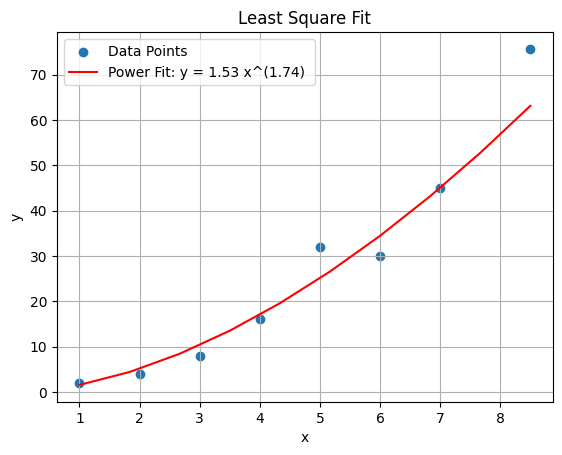

In [ ]:
# Using the Polyfit function from Numpy

import numpy as np
import matplotlib.pyplot as plt

def power_lsq_fit(x,y):
  logx = np.log(x)
  logy = np.log(y)
  m, b = np.polyfit(logx,logy, 1)
  b = np.exp(b)
  return m, b

# Data
x_data = np.array([1,2,3,4,5,6,7,8.5])
y_data = np.array([2,4,8,16,32,30,45,75.7])

m,b = power_lsq_fit(x_data,y_data)
print(m,b)

x_fit=np.linspace(min(x_data),max(x_data), 10)
y_fit = b*pow(x_fit,m)

plt.scatter(x_data,y_data,label="Data Points")
plt.plot(x_fit,y_fit, color='red',label=f"Power Fit: y = {b:.2f} x^({m:.2f}) ")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Least Square Fit")
plt.grid(True)
plt.legend()
plt.show()

## **Exponential Fit**
$$y = b e^{m x}$$
Above relation can be converted to a linear relation by taking log of both the sides:
$$ log(y) = log(b) + m x$$

0.4788075969471198 1.7452905681005195


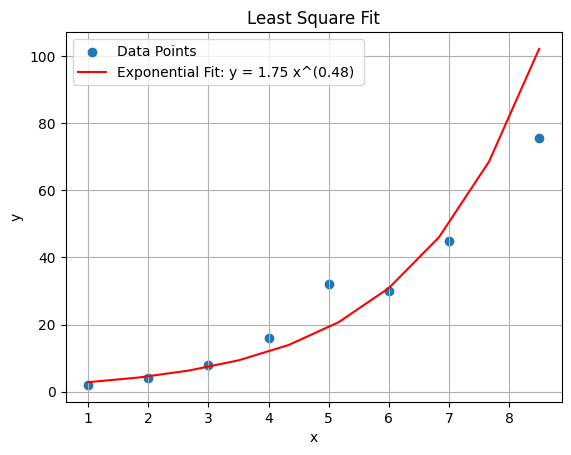

In [ ]:
# Using the Polyfit function from Numpy

import numpy as np
import matplotlib.pyplot as plt

def expo_lsq_fit(x,y):
  logy = np.log(y)
  m, b = np.polyfit(x,logy, 1)
  b = np.exp(b)
  return m, b

# Data
x_data = np.array([1,2,3,4,5,6,7,8.5])
y_data = np.array([2,4,8,16,32,30,45,75.7])

m,b = expo_lsq_fit(x_data,y_data)
print(m,b)

x_fit=np.linspace(min(x_data),max(x_data), 10)
y_fit = b*np.exp(m*x_fit)

plt.scatter(x_data,y_data,label="Data Points")
plt.plot(x_fit,y_fit, color='red',label=f"Exponential Fit: y = {b:.2f} x^({m:.2f}) ")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Least Square Fit")
plt.grid(True)
plt.legend()
plt.show()

## **Weighted Least Square Fit**

The Weighted Least Square (WLS) is the extension of Least Square method where different weights are assigned to different data points.

In WLS the sum of the weighted squared of the difference between observed and predicted value is minimized.

$$S = \sum_{i=1}^n w_i \left( y_i - \left(m x_i + b)\right)^2 \right)$$

Usage of **scipy.optimize**:
$$w_i = \frac{1}{\sigma^2_i}$$
where $w_i$ is the weight associated with $i^{th}$ datapoint and $\sigma_i$ is the uncertainity with that datapoint.  

Slope :  5.836832754125996  Intercept :  -7.112551843910062


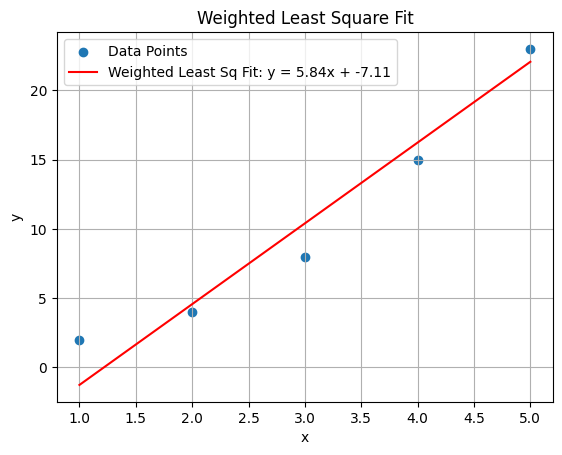

In [6]:
# Linear Fit

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def linear_mod(x,m,b):
  return m*x + b

# Sample data
x_data = np.array([1,2,3,4,5])
y_data = np.array([2,4,8,15,23])

weights = np.array([1,.8,1.5,1,2])

para, cov = curve_fit(linear_mod, x_data, y_data, sigma=1/weights)

m,b = para

print("Slope : ", m, " Intercept : ", b)
x_fit = np.linspace(min(x_data),max(x_data), 10)
y_fit = linear_mod(x_fit,m,b)

plt.scatter(x_data,y_data,label='Data Points')
plt.plot(x_fit,y_fit, color='red', label=f"Weighted Least Sq Fit: y = {m:.2f}x + {b:.2f}")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Weighted Least Square Fit")
plt.grid(True)
plt.show()

1.203045195326587 -1.7610777354406264 2.5641058150074483


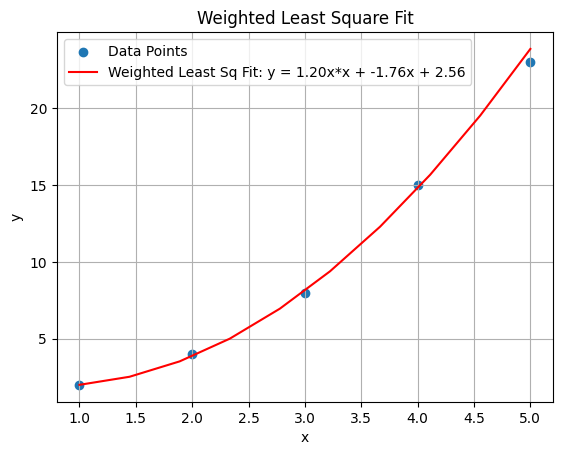

In [10]:
# Quadratic Fit

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def quad_mod(x,a0,a1,a2):
  return a0*x*x + a1*x + a2

# Sample data
x_data = np.array([1,2,3,4,5])
y_data = np.array([2,4,8,15,23])

weights = np.array([1,.8,1.5,1,0.3])

para, cov = curve_fit(quad_mod, x_data, y_data, sigma=1/weights)

a0,a1,a2 = para

print(a0,a1,a2)
x_fit = np.linspace(min(x_data),max(x_data), 10)
y_fit = quad_mod(x_fit,a0,a1,a2)

plt.scatter(x_data,y_data,label='Data Points')
plt.plot(x_fit,y_fit, color='red', label=f"Weighted Least Sq Fit: y = {a0:.2f}x*x + {a1:.2f}x + {a2:.2f}")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Weighted Least Square Fit")
plt.grid(True)
plt.show()